In [29]:
!rm output.tsv

In [30]:
temperatures_range = (0.1, 0.1)
start = temperatures_range[0]
end = temperatures_range[1]
step = 0.1
num_responses = 1

data = {}
temp = temperatures_range[0]
while temp <= end:
    output = f"{temp}\t"
    
    !echo -e "species\tlocation\nblack bears\tbrown bears" | python3 main.py -temp {temp} -t 50 -k 10 -r {num_responses} "Tell a story about {{species}} and {{location}} being friends." >> output.tsv
    
    temp += step

Processing batches: 100%|█████████████████████████| 1/1 [00:01<00:00,  1.22s/it]


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('output.tsv', sep='\t')
df1 = df[df.iloc[:, 0] != df.columns[0]]

## Calculate probabilities distributtion from the responses

In [4]:
df.columns

Index(['species', 'location', 'query', 'response', 'question number',
       'top tokens', 'top tokens logprobs', 'input token count',
       'output token count'],
      dtype='object')

In [5]:
df.head()

,species,location,query,response,question number,top tokens,top tokens logprobs,input token count,output token count
0,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
1,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
2,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
3,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
4,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100


In [6]:
df1.head()

,species,location,query,response,question number,top tokens,top tokens logprobs,input token count,output token count
0,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
1,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
2,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
3,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100
4,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100


In [7]:
import ast
def safe_eval(s):
    try:
        return ast.literal_eval(s)
    except:
        return []
def get_log_prob(row, token):
    tokens = safe_eval(row['top tokens'])
    logprobs = safe_eval(row['top tokens logprobs'])
    
    if token in tokens:
        index = tokens.index(token)
        return logprobs[index] if index < len(logprobs) else None
    else:
        return None

df1['yes_log_probs'] = df1.apply(lambda row: get_log_prob(row, 'Yes'), axis=1)
df1['no_log_probs'] = df1.apply(lambda row: get_log_prob(row, 'No'), axis=1)

df1['temperature'] = np.repeat(np.arange(start, end, step), num_responses).tolist()


/tmp/ipykernel_1358561/1681541808.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['yes_log_probs'] = df1.apply(lambda row: get_log_prob(row, 'Yes'), axis=1)
/tmp/ipykernel_1358561/1681541808.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['no_log_probs'] = df1.apply(lambda row: get_log_prob(row, 'No'), axis=1)
/tmp/ipykernel_1358561/1681541808.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [8]:
print(df1.iloc[0]['top tokens']) 
type(df1.iloc[0]['top tokens'])

['Yes', 'No']


str

In [9]:
df1.head()

,species,location,query,response,question number,top tokens,top tokens logprobs,input token count,output token count,yes_log_probs,no_log_probs,temperature
0,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100,-0.12704,-2.219762,0.1
1,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100,-0.12704,-2.219762,0.1
2,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100,-0.12704,-2.219762,0.1
3,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100,-0.12704,-2.219762,0.1
4,black bears,brown bears,"Only respond yes or no to my questions, even i...",Yes,0,"['Yes', 'No']","[-0.12703992, -2.2197618]",33,100,-0.12704,-2.219762,0.1


In [10]:
# drop unnecessary columns
df1.drop(['question number', 'query', 'top tokens', 'top tokens logprobs', 'input token count', 'output token count'], axis=1, inplace=True)

/tmp/ipykernel_1358561/2854542454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['question number', 'query', 'top tokens', 'top tokens logprobs', 'input token count', 'output token count'], axis=1, inplace=True)


In [11]:
df1.head()

,species,location,response,yes_log_probs,no_log_probs,temperature
0,black bears,brown bears,Yes,-0.12704,-2.219762,0.1
1,black bears,brown bears,Yes,-0.12704,-2.219762,0.1
2,black bears,brown bears,Yes,-0.12704,-2.219762,0.1
3,black bears,brown bears,Yes,-0.12704,-2.219762,0.1
4,black bears,brown bears,Yes,-0.12704,-2.219762,0.1


In [12]:
grouped = df1.groupby(['temperature', 'response']).size().unstack(fill_value=0)

In [13]:
probabilities = grouped.div(grouped.sum(axis=1), axis=0)
probabilities = probabilities.reset_index()

print("Probabilities of responses for each temperature:")
print(probabilities)

Probabilities of responses for each temperature:
response  temperature    No   Yes
0                 0.1  0.00  1.00
1                 0.2  0.00  1.00
2                 0.3  0.00  1.00
3                 0.4  0.01  0.99
4                 0.5  0.01  0.99
5                 0.6  0.03  0.97
6                 0.7  0.08  0.92
7                 0.8  0.03  0.97
8                 0.9  0.06  0.94
9                 1.0  0.10  0.90
10                1.1  0.13  0.87
11                1.2  0.15  0.85
12                1.3  0.14  0.86
13                1.4  0.16  0.84
14                1.5  0.17  0.83
15                1.6  0.17  0.83
16                1.7  0.15  0.85
17                1.8  0.20  0.80
18                1.9  0.19  0.81


In [22]:
probabilities.columns

Index(['temperature', 'No', 'Yes'], dtype='object', name='response')

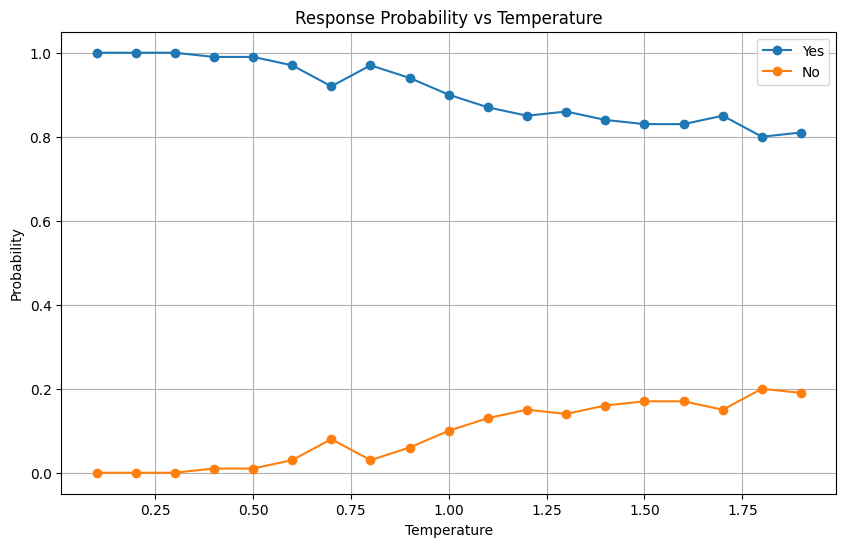

In [23]:

from matplotlib import pyplot as plt

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(probabilities['temperature'], probabilities['Yes'], marker='o', label='Yes')
plt.plot(probabilities['temperature'], probabilities['No'], marker='o', label='No') #
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.title('Response Probability vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

